In [1]:
from src.MO_DQN import MO_DQN
import mo_gymnasium as mo_gym
from src.gridsearch import gridsearch
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting

### Configure and run the experiments

In [2]:
#experiment configurations
env_config_1 = {
        "collision_reward": -1,
        "observation": {
            "type": "MultiAgentObservation",
            "observation_config": {
                "type": "OccupancyGrid",
                "vehicles_count": 15,
                "features": ["presence", "x", "y", "vx", "vy"],
                "features_range": {
                    "x": [-100, 100],
                    "y": [-100, 100],
                    "vx": [-20, 20],
                    "vy": [-20, 20]
                },
                "grid_size": [[-27.5, 27.5], [-27.5, 27.5]],
                "grid_step": [5, 5],
            }
        }
    }

env_config_2 = {
        "collision_reward": -5,
        "observation": {
            "type": "MultiAgentObservation",
            "observation_config": {
                "type": "OccupancyGrid",
                "vehicles_count": 15,
                "features": ["presence", "x", "y", "vx", "vy"],
                "features_range": {
                    "x": [-100, 100],
                    "y": [-100, 100],
                    "vx": [-20, 20],
                    "vy": [-20, 20]
                },
                "grid_size": [[-27.5, 27.5], [-27.5, 27.5]],
                "grid_step": [5, 5],
            }
        }
    }

env_config_3 = {
        "collision_reward": -10,
        "observation": {
            "type": "MultiAgentObservation",
            "observation_config": {
                "type": "OccupancyGrid",
                "vehicles_count": 15,
                "features": ["presence", "x", "y", "vx", "vy"],
                "features_range": {
                    "x": [-100, 100],
                    "y": [-100, 100],
                    "vx": [-20, 20],
                    "vy": [-20, 20]
                },
                "grid_size": [[-27.5, 27.5], [-27.5, 27.5]],
                "grid_step": [5, 5],
            }
        }
    }

run_config = {
    "env": [env_config_1, env_config_2, env_config_3],
    "init": {
         "gamma": [0.9],
         "replay_buffer_size": [1000],
         "use_reward_normalisation_wrapper": [False],
         "use_default_reward_normalisation": [True]
    },
    "train": {
         "num_iterations" : 150_000,
         "inv_target_update_frequency": 20,
         "epsilon_start": 0.9,
         "epsilon_end": 0
    },
    "eval": {
        "num_repetitions": 20,
        "num_points": 30,
        "episode_recording_interval": None,
        "render_episodes": False
    },
}

In [3]:
#run the experiments
env = mo_gym.make('mo-highway-env-v0', render_mode='rgb_array')
gridsearch(MO_DQN, env, run_config, 11, csv_file_path="data/crash_reward_adjustments2/")


Weight tuple: 100%|██████████| 30/30 [12:54<00:00, 25.82s/it]



Weight tuple: 100%|██████████| 30/30 [12:36<00:00, 25.23s/it]



Weight tuple: 100%|██████████| 30/30 [13:10<00:00, 26.34s/it]




### Data preprocessing

In [4]:
#load the data
df_complete = pd.read_csv("data/crash_reward_adjustments2/experiment_merged.csv")
display(df_complete.info())
display(df_complete)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        1800 non-null   int64  
 1   repetition_number                 1800 non-null   int64  
 2   weight_index                      1800 non-null   int64  
 3   weight_tuple                      1800 non-null   object 
 4   num_iterations                    1800 non-null   int64  
 5   normalised_speed_reward           1800 non-null   float64
 6   normalised_energy_reward          1800 non-null   float64
 7   raw_speed_reward                  1800 non-null   float64
 8   raw_energy_reward                 1800 non-null   float64
 9   env_config_id                     1800 non-null   int64  
 10  gamma                             1800 non-null   float64
 11  replay_buffer_size                1800 non-null   int64  
 12  use_re

None

,Unnamed: 0,repetition_number,weight_index,weight_tuple,num_iterations,normalised_speed_reward,normalised_energy_reward,raw_speed_reward,raw_energy_reward,env_config_id,gamma,replay_buffer_size,use_reward_normalisation_wrapper,use_default_reward_normalisation
0,0,0,0,"[0.0, 1.0]",80,0.091771,0.999769,7.341663,79.981488,0,0.9,1000,False,True
1,1,1,0,"[0.0, 1.0]",80,0.061468,0.969466,4.917421,77.557246,0,0.9,1000,False,True
2,2,2,0,"[0.0, 1.0]",80,0.069786,0.962668,5.582892,77.013438,0,0.9,1000,False,True
3,3,3,0,"[0.0, 1.0]",80,0.061468,0.969466,4.917421,77.557246,0,0.9,1000,False,True
4,4,4,0,"[0.0, 1.0]",80,0.061468,0.969466,4.917421,77.557246,0,0.9,1000,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,595,15,29,"[1.0, 0.0]",80,0.895828,0.605417,71.666224,48.433332,2,0.9,1000,False,True
1796,596,16,29,"[1.0, 0.0]",80,0.972779,0.597850,77.822353,47.828036,2,0.9,1000,False,True
1797,597,17,29,"[1.0, 0.0]",80,0.794689,0.620273,63.575139,49.621845,2,0.9,1000,False,True
1798,598,18,29,"[1.0, 0.0]",41,0.327765,0.412332,13.438350,16.905611,2,0.9,1000,False,True


In [5]:
#preprocess the dataframe
multi_index_list = ["env_config_id"]
value_list = ['normalised_speed_reward', 'normalised_energy_reward']
table = pd.pivot_table(df_complete, values=value_list, index=multi_index_list,
                        columns=['weight_index'], aggfunc="mean")
table = table.reset_index()
table['experiment_index'] = table.index
display(table)

env_config_id normalised_energy_reward                      \
weight_index                                      0         1         2   
0                        0                 0.949207  0.955170  0.949296   
1                        1                 0.994390  0.988029  0.986467   
2                        2                 0.981488  0.977540  0.981011   

                                                                          ...  \
weight_index         3         4         5         6         7         8  ...   
0             0.954870  0.965868  0.944193  0.987122  0.971648  0.968229  ...   
1             0.980292  0.983673  0.981077  0.976242  0.939011  0.939354  ...   
2             0.980690  0.979514  0.848827  0.983056  0.952553  0.944157  ...   

             normalised_speed_reward                                          \
weight_index                      21        22        23        24        25   
0                           0.818126  0.855975  0.857546  0.839662  0.862742   
1                           0.792860  0.761479  0.716837  0.804873  0.769872   
2                           0.667894  0.352987  0.602461  0.709780  0.459774   

                                                     experiment_index  
weight_index        26        27        28        29                   
0             0.884024  0.867833  0.860741  0.854468                0  
1             0.644784  0.799894  0.769029  0.592541                1  
2             0.688499  0.443314  0.382615  0.512759                2  

[3 rows x 62 columns]

In [6]:
multi_index_list = ['env_config_id', "weight_index"]

grouped_df = df_complete.groupby(multi_index_list)[value_list].mean()
index = grouped_df.index
grouped_df = grouped_df.reset_index()
grouped_df.set_index(index, inplace=True)
multi_index_list.remove("weight_index")
grouped_df["experiment"] = grouped_df[multi_index_list].apply(tuple, axis=1)
display(grouped_df.info())
display(grouped_df)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 90 entries, (0, 0) to (2, 29)
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   env_config_id             90 non-null     int64  
 1   weight_index              90 non-null     int64  
 2   normalised_speed_reward   90 non-null     float64
 3   normalised_energy_reward  90 non-null     float64
 4   experiment                90 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 5.2+ KB


None

env_config_id  weight_index  \
env_config_id weight_index                                
0             0                         0             0   
              1                         0             1   
              2                         0             2   
              3                         0             3   
              4                         0             4   
...                                   ...           ...   
2             25                        2            25   
              26                        2            26   
              27                        2            27   
              28                        2            28   
              29                        2            29   

                            normalised_speed_reward  normalised_energy_reward  \
env_config_id weight_index                                                      
0             0                            0.045542                  0.949207   
              1                            0.050182                  0.955170   
              2                            0.041666                  0.949296   
              3                            0.054277                  0.954870   
              4                            0.059867                  0.965868   
...                                             ...                       ...   
2             25                           0.459774                  0.213208   
              26                           0.688499                  0.490404   
              27                           0.443314                  0.335514   
              28                           0.382615                  0.097223   
              29                           0.512759                  0.357409   

                           experiment  
env_config_id weight_index             
0             0                  (0,)  
              1                  (0,)  
              2                  (0,)  
              3                  (0,)  
              4                  (0,)  
...                               ...  
2             25                 (2,)  
              26                 (2,)  
              27                 (2,)  
              28                 (2,)  
              29                 (2,)  

[90 rows x 5 columns]

In [7]:
nds = NonDominatedSorting()
value_columns = ["normalised_speed_reward", "normalised_energy_reward"]
#add pareto information
grouped_df["pareto"] = False
experiment_indices = grouped_df["experiment"].unique()
for index in experiment_indices:
    #get data of a specific experiment
    data = grouped_df[grouped_df["experiment"] == index]
    #compute the indices containing non-dominated points
    pareto_indices = nds.do(-1 * data[value_columns], only_non_dominated_front=True)
    #set pareto flag to True at the corresponding indices of the entire dataframe
    grouped_df.loc[(grouped_df["experiment"] == index) & (data["weight_index"].isin(pareto_indices)),"pareto"] = True


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False



<Axes: xlabel='normalised_speed_reward', ylabel='normalised_energy_reward'>

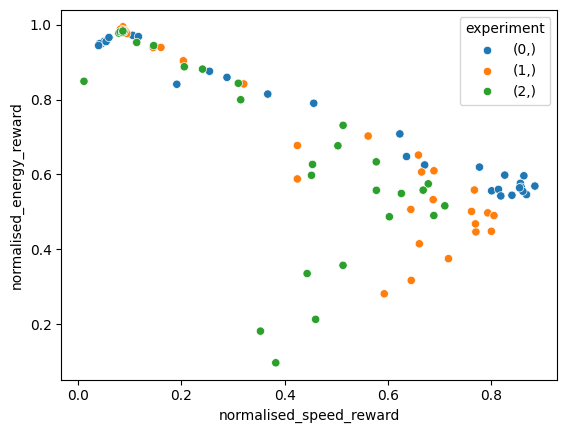

In [8]:
#plot all points
import seaborn as sns
sns.scatterplot(data=grouped_df, x='normalised_speed_reward', y='normalised_energy_reward', hue="experiment")

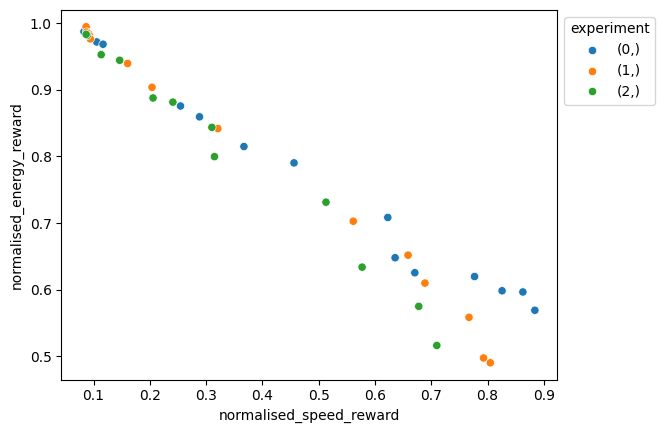

In [9]:
#plot only non-dominated points
ax = sns.scatterplot(data=grouped_df[grouped_df["pareto"]==True], x='normalised_speed_reward', y='normalised_energy_reward', hue="experiment")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [10]:
# num iterations
multi_index_list = ['env_config_id', "weight_index"]
value_list = ["num_iterations"]
grouped_df = df_complete.groupby(multi_index_list)[value_list].mean()
index = grouped_df.index
grouped_df = grouped_df.reset_index()
grouped_df.set_index(index, inplace=True)
multi_index_list.remove("weight_index")
grouped_df["experiment"] = grouped_df[multi_index_list].apply(tuple, axis=1)

env_config_id  weight_index
0              0               80.00
               1               80.00
               2               80.00
               3               80.00
               4               80.00
                               ...  
2              25              47.05
               26              63.25
               27              55.25
               28              45.20
               29              65.95
Name: num_iterations, Length: 90, dtype: float64

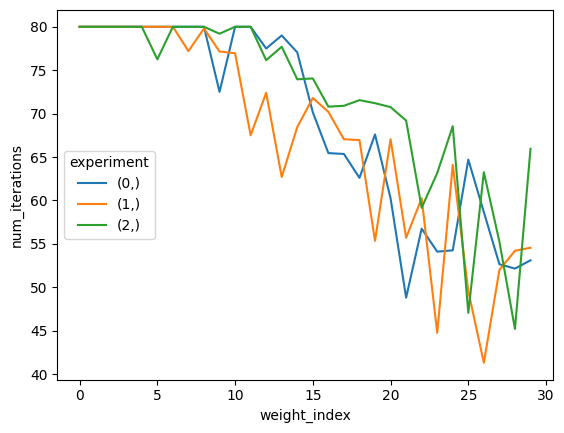

In [11]:
ax = sns.lineplot(grouped_df, x="weight_index", y="num_iterations", hue="experiment")
sns.move_legend(ax, "center left")

df_complete.groupby(["env_config_id", "weight_index"])["num_iterations"].mean()

experiment_id 0 --> collision reward -1
experiment_id 1 --> collision reward 0
--> collision reward of -1 works better.